In [32]:
import sys; sys.path.append("../../")
import DataPreprocessing
from DataPreprocessing.DataPreprocessing import *
import DataExploration
from DataExploration import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



## Read data 

In [25]:
df = read_data(kind='train')
df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Akai Katana Shin,X360,2011.0,Shooter,Cave,0.04,0.00,0.01,0.00,0.06,NaN,NaN,NaN,NaN,NaN,NaN
1,One Piece: Unlimited World Red,WiiU,2014.0,Action,Namco Bandai Games,0.00,0.04,0.02,0.00,0.06,66.0,11.0,7.8,43.0,Ganbarion,T
2,Lunar Knights,DS,2006.0,Role-Playing,Konami Digital Entertainment,0.17,0.01,0.04,0.01,0.23,82.0,39.0,7.8,25.0,Kojima Productions,E10+
3,Secret Game Portable,PSP,2010.0,Adventure,Yeti,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
4,Far Cry 2,X360,2008.0,Action,Ubisoft,0.71,0.69,0.02,0.18,1.59,85.0,75.0,6.7,288.0,Ubisoft Montreal,M


## Handle Missing Values

In [26]:
df =handle_missing_values(df)
df.head()

Total Number of rows : 10031
Number of rows with missing values: 5954
Number of rows after dropping: 4077


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,One Piece: Unlimited World Red,WiiU,2014.0,Action,Namco Bandai Games,0.00,0.04,0.02,0.00,0.06,66.0,11.0,7.8,43.0,Ganbarion,T
2,Lunar Knights,DS,2006.0,Role-Playing,Konami Digital Entertainment,0.17,0.01,0.04,0.01,0.23,82.0,39.0,7.8,25.0,Kojima Productions,E10+
4,Far Cry 2,X360,2008.0,Action,Ubisoft,0.71,0.69,0.02,0.18,1.59,85.0,75.0,6.7,288.0,Ubisoft Montreal,M
5,Pirates of the Caribbean: The Legend of Jack S...,PS2,2006.0,Adventure,Ubisoft,0.12,0.09,0.00,0.03,0.25,51.0,32.0,7.5,13.0,7 Studios,T
6,Guitar Hero Encore: Rocks The 80s,PS2,2007.0,Misc,RedOctane,0.92,0.04,0.00,0.15,1.11,69.0,50.0,6.3,31.0,Harmonix Music Systems,T


## Features Histogram

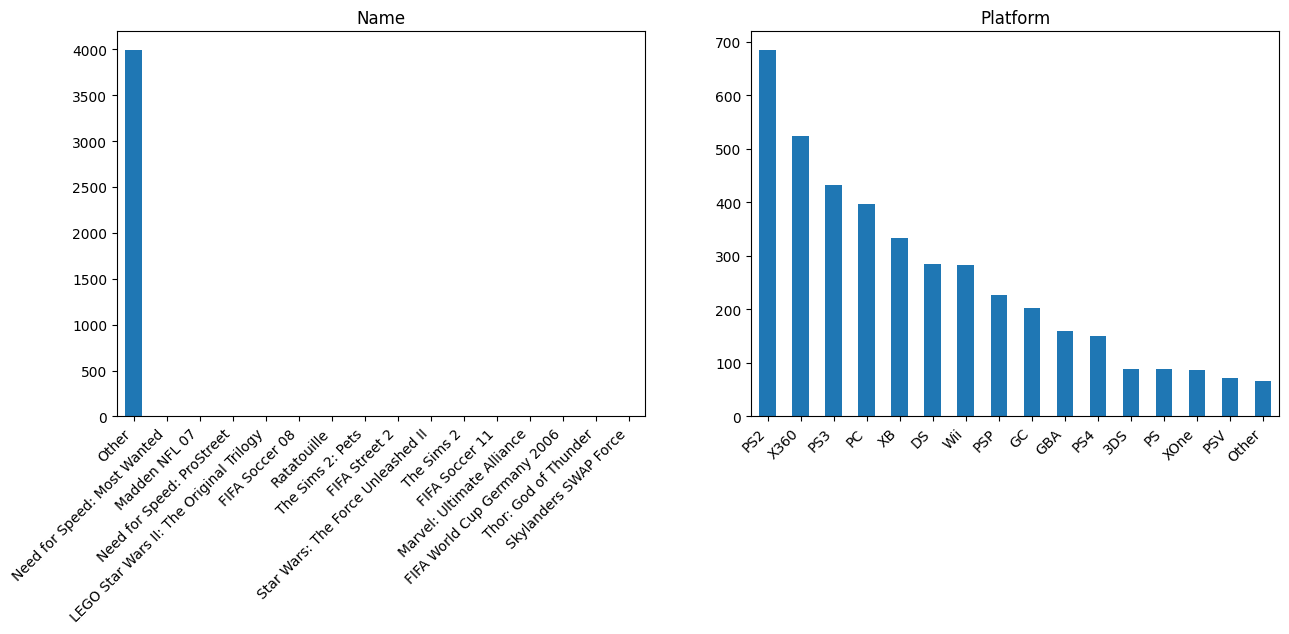

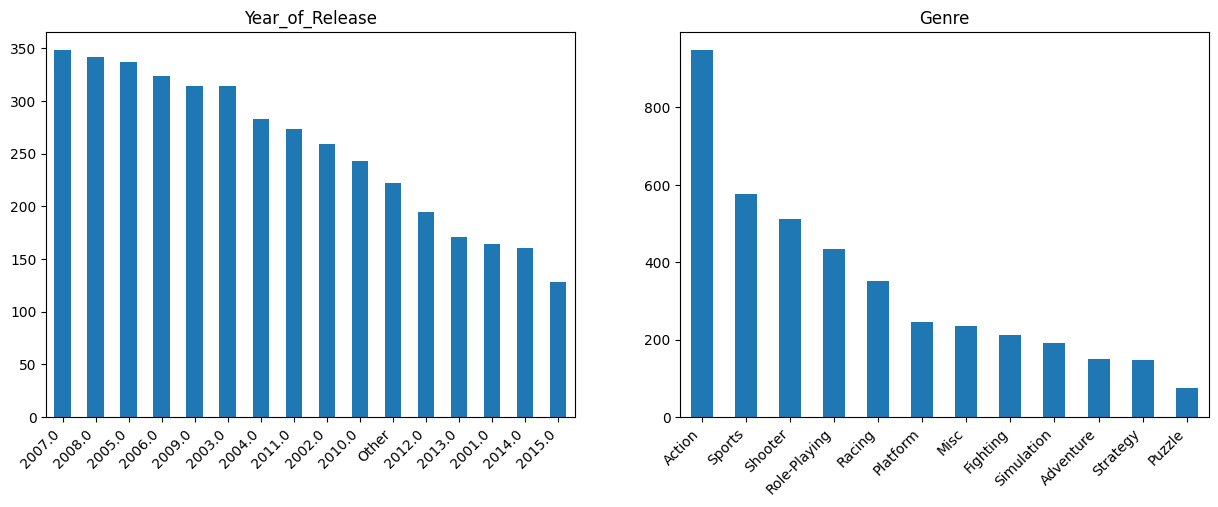

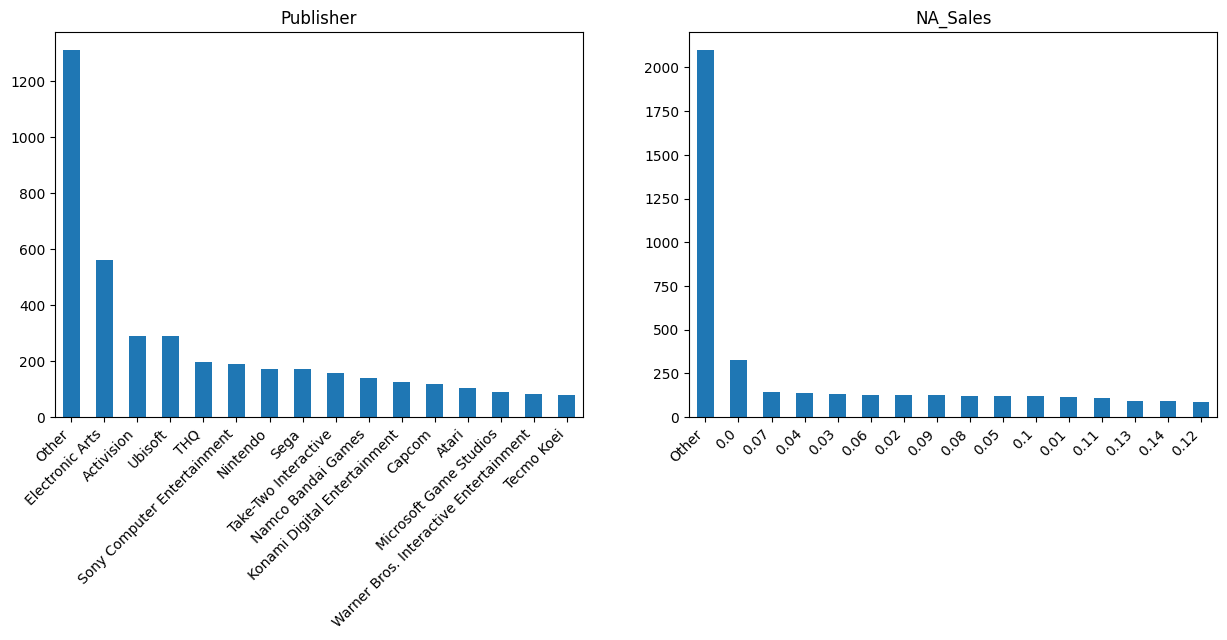

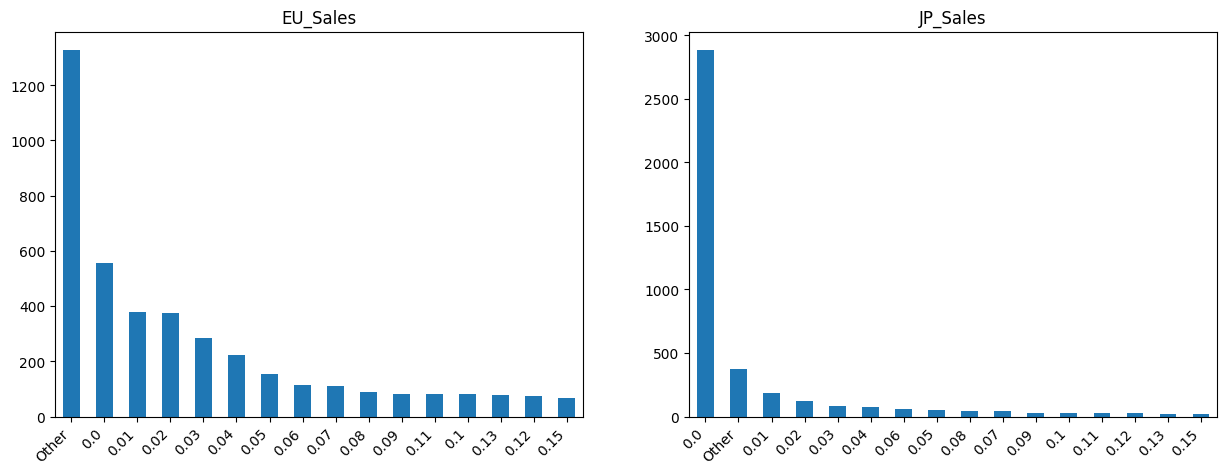

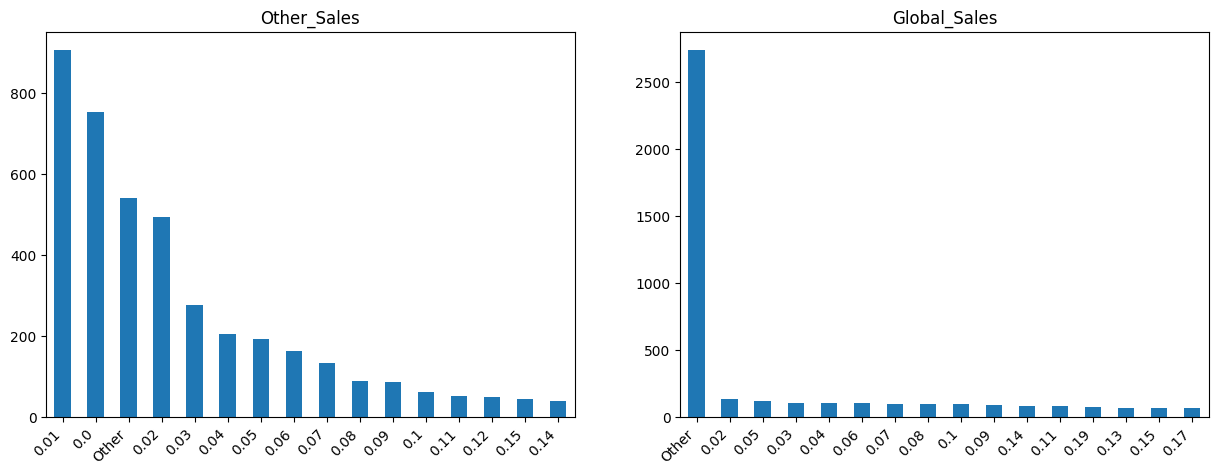

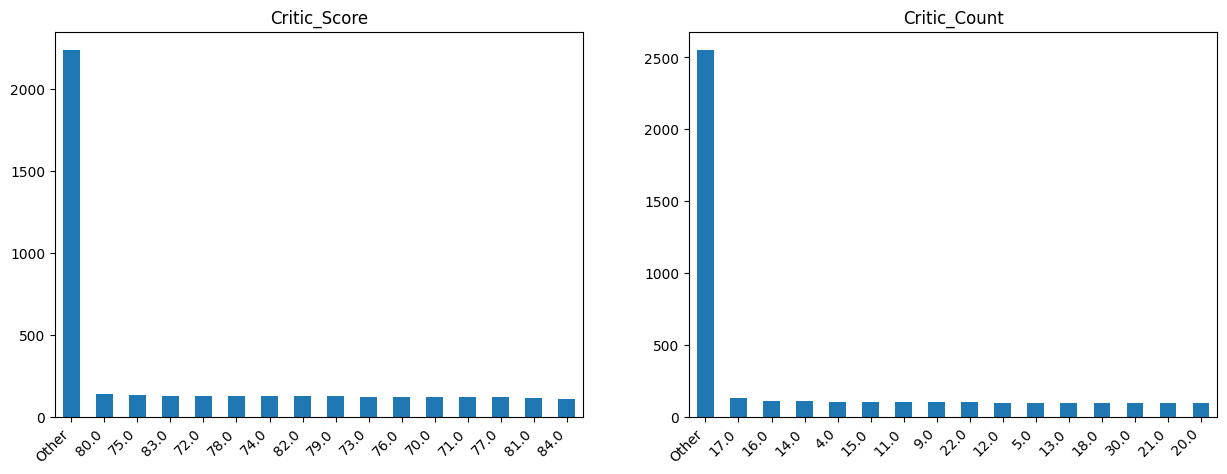

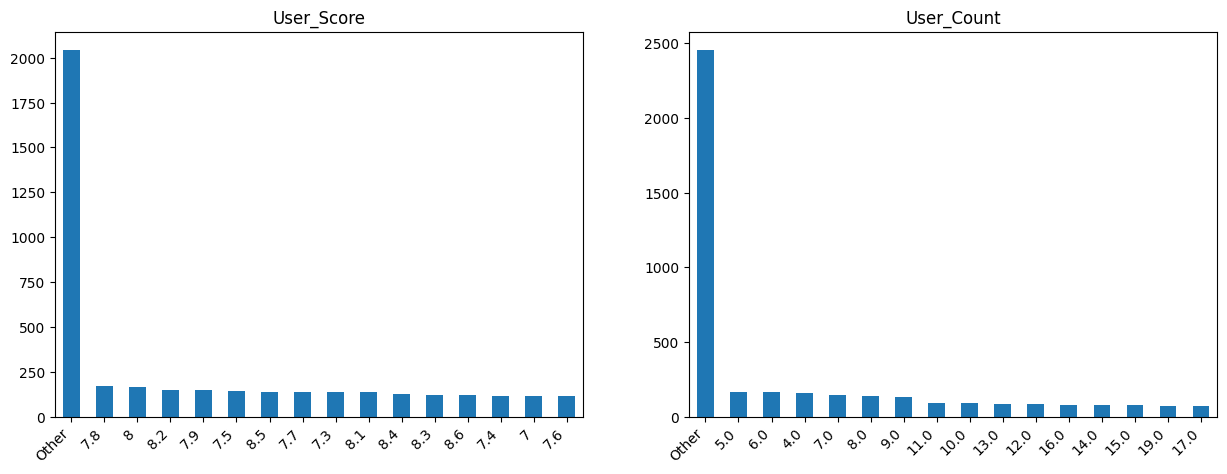

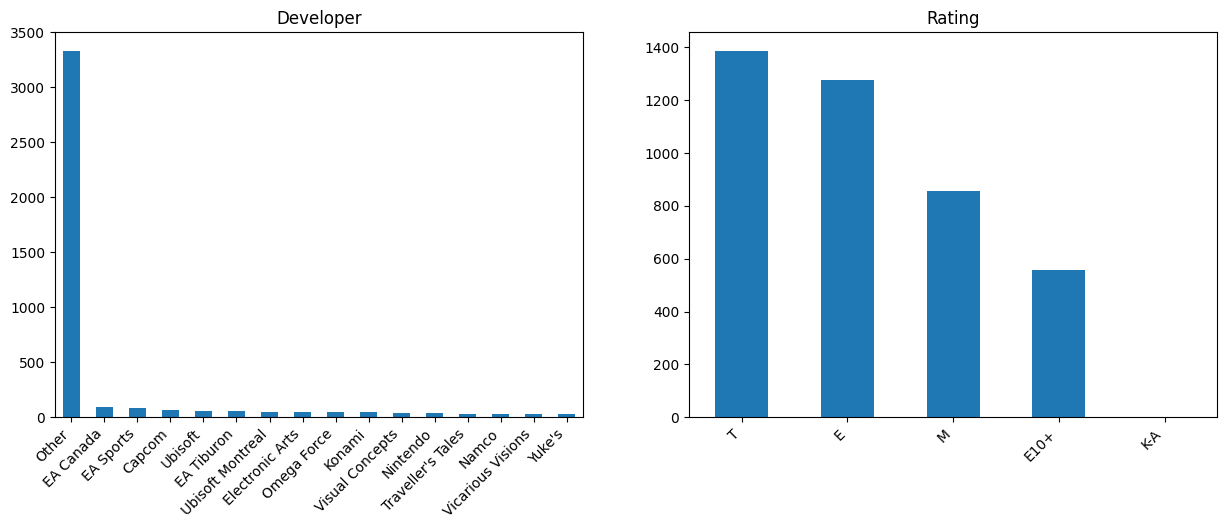

In [27]:
plot_hist(df)

# Analysis

## Global sales distribution over all genres

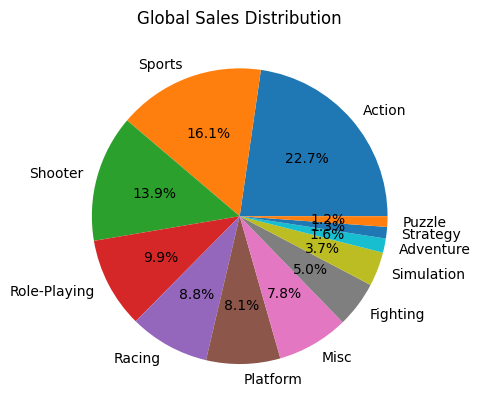

In [39]:
genres = df['Global_Sales'].groupby(df['Genre']).sum().sort_values(ascending=False).to_frame()
plt.pie(genres['Global_Sales'],labels = genres.index,autopct = '%1.1f%%') #plot first pie
plt.title('Global Sales Distribution')
plt.show()


## Developers with highest score

## Games Published Annually

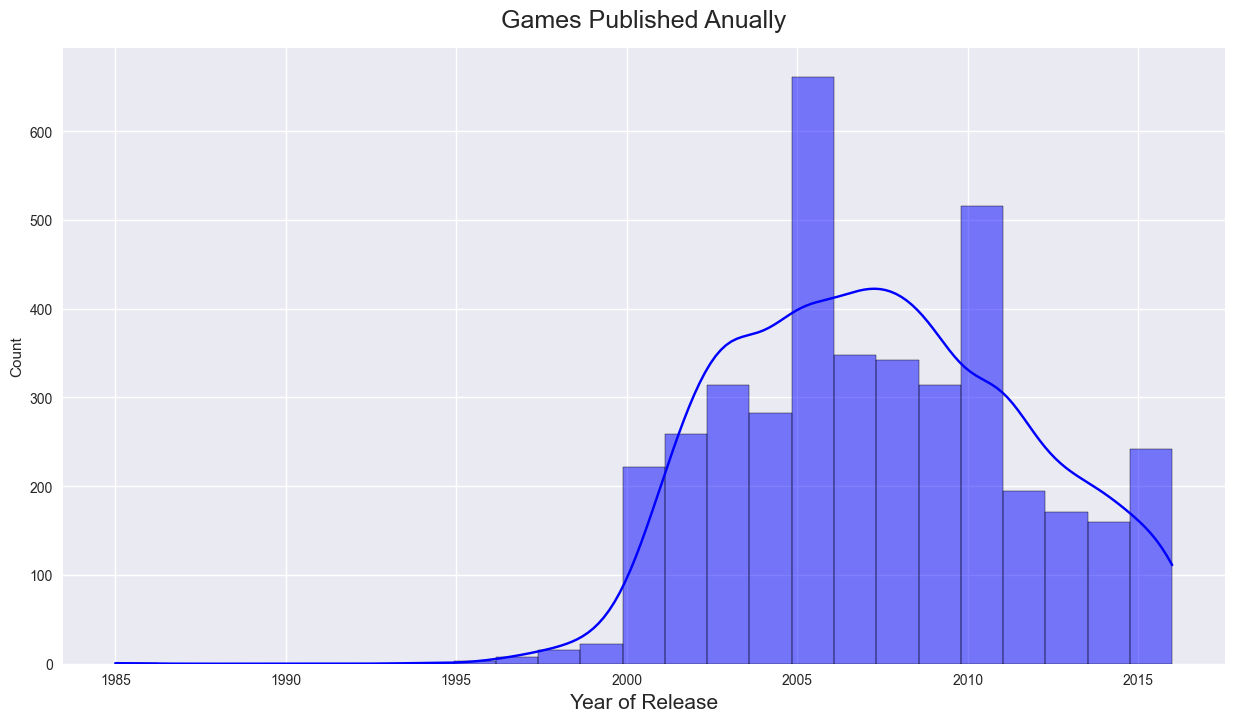

In [48]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(df["Year_of_Release"], color="blue", kde=True, bins=25)
plt.title("Games Published Annually", fontsize=18, y=1.02)
ax.set_xlabel("Year of Release",fontsize=15);

# Correlation between features

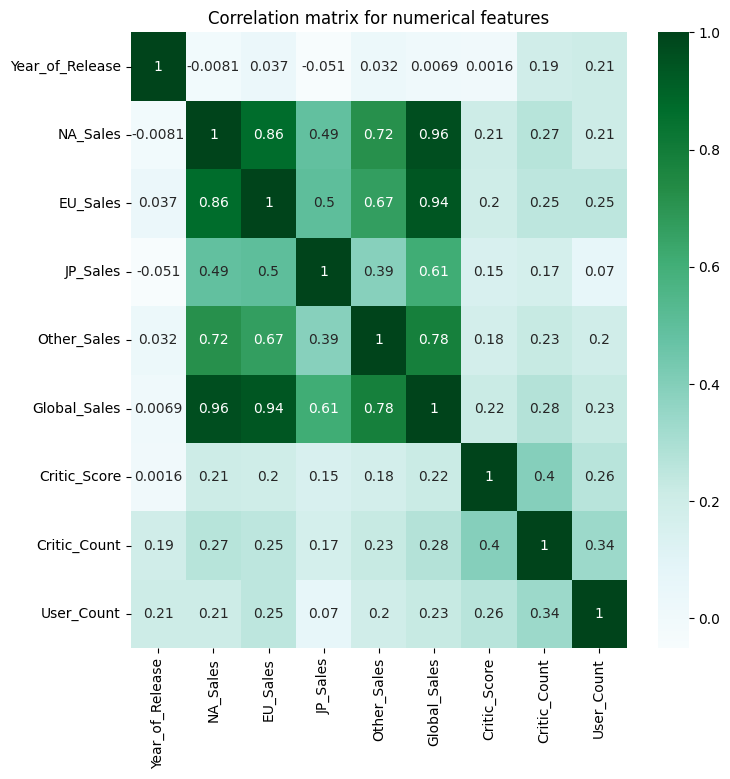

In [4]:
num_features = [col for col in df.columns if type(df.iloc[0, df.columns.get_loc(col)]) != str]
df_num_features = df[num_features]
num_corr= df_num_features.corr()
plt.figure(figsize=(8,8))
sns.heatmap(num_corr, annot=True, cmap='BuGn')
plt.title(f"Correlation matrix for numerical features")
plt.show()